In [4]:
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import erf

In [38]:
import matplotlib.pyplot as plt

In [89]:
step = 0.127 # mm
power = np.asarray([29.6, 29.6, 29.6, 29.5, 29.4, 29, 27.7, 24.7, 19.9, 14, 8.3, 3.9, 
                    1.4, 0.4, 0.1, 0.1, 0.1, 0.1, 0.1, 0]) # mW

### Define the model for fitting

In [65]:
def direction(power):
    return (np.sign(power[0] - power[-1]))

In [61]:
# See, e.g., Equation 2 in https://opg.optica.org/ao/fulltext.cfm?uri=ao-52-16-3849&id=255405
def model(y, alpha, w, y0, bg, direction):
    return (1/4.) * np.pi * alpha * w * w * (direction * erf(np.sqrt(2)*(y-y0)/w) + 1) + bg

In [83]:
def fit_beam_size(step, power, guess=[80/np.pi, 0.7, 2e-5, 0]):
    _direction = direction(power)
    power = np.asarray(power)
    
    # Positions of each measurement
    y = -1 * np.arange(power.size) * step
    popt, pcov = curve_fit(lambda y, alpha, w, y0, bg: model(y, alpha, w, y0, bg, _direction)
                           , y, power, p0=guess, maxfev=5000)

    # `alpha`: normalized total power,
    # `w`: beam size,
    # `y0`: beam center,
    # `bg`: background
    return popt

### Fit and plot the result

In [86]:
alpha, w, y0, bg = fit_beam_size(step, power)
print(alpha, w, y0, bg)

80.28400706285824 0.4840610536062074 -1.1257655633022001 0.039516727534008075


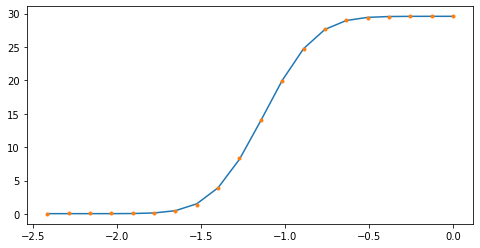

In [87]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(y, model(y, alpha, w, y0, bg, direction(power)))
ax.plot(y, power, '.')